# Whiteboard futures

# ----[ Future work below here ]----

Below here is future work. All but not started but with enough text and picures to show lines along which things could develop.

Sreeni's pipeline
- Denoise
- Threshold
- `binary_opening()`
- `binary_closeing()`

# White balance

Qs and Is:
- If we know the 4 colors (black, red, blue, green) then perhaps try to detect them in RAW and then "white balance" to those.
What's the relation to contrast and balance? Are those color concepts?
- Would this be relevant for RAW images?
- UI to drag-pick known point to call white.


- [Tutorials: White Balance](https://www.cambridgeincolour.com/tutorials/white-balance.htm) from a generic photographer perspective, good intro
- [Color Balance in Digital Imaging](https://www.microscopyu.com/digital-imaging/color-balance-in-digital-imaging) on microscopyu.com
- Some hand coding:
  - [Correcting image white balance with Python PIL and Numpy](https://codeandlife.com/2019/08/17/correcting-image-white-balance-with-python-pil-and-numpy/)
  - [Automatic White Balancing with Grayworld assumption
](https://stackoverflow.com/questions/46390779/automatic-white-balancing-with-grayworld-assumption)



[White Balance a photo from a known point](https://stackoverflow.com/a/54481969/4669056):
>The computation of lum will be better if using proper weights: 0.2126, 0.7152, 0.0722

## Simple White Balance

I think this might have started as this Matlab code [simplestColorBalance.m](https://web.stanford.edu/~sujason/ColorBalancing/simplestcb.html#nogo), as [discussed on stackoverflow](https://stackoverflow.com/a/49481583/4669056).

- https://stackoverflow.com/a/49481583/4669056
  - https://gist.github.com/DavidYKay/9dad6c4ab0d8d7dbf3dc

## Xphoto
https://stackoverflow.com/a/49836244/4669056:

>The answer can be found in [the xphoto documentation](https://docs.opencv.org/3.4.1/df/db9/namespacecv_1_1xphoto.html)
.  
>The appropriate methods to create the WB algorithms are createSimpleWB(), createLearningBasedWB() and createGrayworldWB().  
> &nbsp;   
>Example:
```python
wb = cv2.xphoto.createGrayworldWB()
wb.setSaturationThreshold(0.99)
image = wb.balanceWhite(image)
```


```
simple_wb = cv2.xphoto.createSimpleWB()
simple_img = simple_wb.balanceWhite(cv2_img)

gray_wb = cv2.xphoto.createGrayworldWB()
gray_wb.setSaturationThreshold(0.99)
gray_img = gray_wb.balanceWhite(cv2_img)

learning_wb = cv2.xphoto.createLearningBasedWB()
learning_img = learning_wb.balanceWhite(cv2_img)

show_cv2_img(cv2_img)
show_cv2_img(simple_img)
show_cv2_img(gray_img)
show_cv2_img(learning_img)

```

## Learning white balance

https://docs.opencv.org/master/dc/dcb/tutorial_xphoto_training_white_balance.html

>Many traditional white balance algorithms are statistics-based, i.e. they rely on the fact that certain assumptions should hold in properly white-balanced images like the well-known grey-world assumption. However, better results can often be achieved by leveraging large datasets of images with ground-truth illuminants in a learning-based framework. This tutorial demonstrates how to train a learning-based white balance algorithm and evaluate the quality of the results.

## Learning to see in the dark

- https://cchen156.github.io/
  - https://cchen156.github.io/paper/18CVPR_SID.pdf
- https://twitter.com/johntigue/status/1258179099199041536
- https://github.com/cydonia999/Learning_to_See_in_the_Dark_PyTorch

In:  
<img src="https://github.com/cydonia999/Learning_to_See_in_the_Dark_PyTorch/raw/master/results/10106_00_30s.png" />

Out:  
<img src="https://github.com/cydonia999/Learning_to_See_in_the_Dark_PyTorch/raw/master/results/10106_00_0.1s_pytorch.png" />


# Color 
[What about sns.pairplot. Scatter is not histo but it's still color analysis. So, this should be moved to "Color stats"?]

Separately it is describe in [Combo Charts with Seaborn and Python](https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950)


## OpenCV vs skimage color

Here's someone who has already gone through the OpenCV on Colab tire kicking:
[Computer Vision - Instructional Exercise](https://colab.research.google.com/drive/1RWGmqoEQdeyh5TssoGtsXsFk8hbLGtWp). 

One is float 0..1, and other is uint8
```python
print(f'skimage: {grayed_image[0,0]}')
print(f'OpenCV: {cv2_grayed[0,0]}')
```

There seems to be a hassle on Colab WRT OpenCV. OpenCV used BGR color order, the reverse of the web's RGB order from HTML and CSS. But Colab doesn't like OpenCV's display utilities so we need to use something else, necessitating a translation from BGR => RGB.

Simply feeding a OpenCV image to Matplotlib will cause the colors to be interpreted as RGB, but they are really BGR. Notice how the pizza slice is blue in the following image (it should be red).

In [0]:
def show_cv2_img(a_cv2_img):
  """cv2's BGR => normal world RGB => MPL show()"""
  imgrgb = cv2.cvtColor(a_cv2_img, cv2.COLOR_BGR2RGB)
  #sns.set_style('dark')
  plt.imshow(imgrgb)
  plt.show()
show_cv2_img(cv2_img)


In [0]:
plt.rcParams["axes.grid"] = False
_ = plt.imshow(cv2_img) # ERROR: feeding BGR color; expects RGB color

In [0]:
# TODO: temp patched on 2020-04-24
# Original code that Colab eventually disabled: 
#   cv2.imshow("gray", gray)
# See  https://github.com/reconstrue/brightfield/issues/206
# They suggested instead:
# from google.colab.patches import cv2_imshow

google.colab.patches.cv2_imshow(cv2_img)


## Color histogram

Technically, [brightness is not a color property, if used "correctly".](http://www.workwithcolor.com/color-properties-definitions-0101.htm) 

[Clever Girl: A Guide to Utilizing Color Histograms for Computer Vision and Image Search Engines](https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/) has 3 "2d histograms" of R_vs_G, R_vs_B, B_vs_G.

[An idea: do a grayscale intensity distribution. Think of each histogram bar as a stack of pixels, all 
with the same intensity. Then use Datashader to plot the "histogram" by plotting each pixel in its original color on the histogram. Within each bar, sort by color and then plot the bar with those colors (ergo the reason to use Datashader).]

Next is the per-channel histogram. Each of the 3 color channels is extracted in the only logical fashion: as the three channel slice 2D arrays. The fourth line (gray) is the one where there are two ways to proceed; choise depends on what you want to show. 

One way is to look at it as total: just `ravel()` all the values from the 3 channel slices into one shapeless bucket of unit8's and histogram the total. This technique is used in, for example, [Histograms in Image Processing with skimage-Python](https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935):
```pyton
_ = plt.hist(image.ravel(), bins = 256, color = 'lightgray', ) # ravel() 3 colors together
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
```


The other way is: show the perceived grayscale intensity. The latter is arguably more valuable for this whiteboarder project. In other words, the gray will maintain its meaning from the above plot of grayscale intensities.

Note this means that we should not attempt to convert some color image, `a_color_image` (x,y,3), to grayscale by simply calling `a_color_image.ravel()`. Calling `ravel()` will return an array of uint8 whi
ch is 3 times x times y. What we actually want is an array the same size as the number of pixels, not 3 times that full of numbers which do not correspond to human perceived luminance of the color image, rather simply the RGB colors broken apart to R, G, B.


In [0]:
#@markdown Image color channels dissociated
image = skimage.io.imread(in_file_name)

plt.figure(figsize=(12,8))
_ = plt.hist(image.ravel(), bins = 256, color = 'lightgray', ) # TODO: ravel() a color img? image = io.imread(in_file)
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])

plt.rcParams["axes.grid"] = False
plt.rcParams["patch.linewidth"] = 0.001 # suppress plotting error noise
plt.show()

An visual cleaner version of roughly the same can be found in [OpenCV's demo hist](https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html). Notice how intensities without any pixel are not as clearly represented.


In [0]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([cv2_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Color windowing
The following is a 3-band windower which is then used as mask [[*](https://medium.com/@ckyrkou/color-thresholding-in-opencv-91049607b06d)]:
```python
lower_color_bounds = cv.Scalar(100, 0, 0)
upper_color_bounds = cv.Scalar(225,80,80)
 
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # Note, gray is never used
mask = cv2.inRange(frame,lower_color_bounds,upper_color_bounds )
mask_rgb = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
frame = frame & mask_rgb
cv2.imshow(‘Video’,frame)
```


## Exposure and brightness sliders?

[Tim Grey](http://asktimgrey.com/2016/07/11/exposure-versus-brightness/):
>the Exposure slider (such as that in Lightroom and Adobe Camera Raw) will use a scale based on exposure value (EV), which is measured in stops of light.
>
>A brightness adjustment also obviously adjusts the overall tonal values for an image, though with an adjustment typically measured as an overall percentage rather than exposure values.


## Saturation 

[Saturation is a feature of color](http://www.workwithcolor.com/color-properties-definitions-0101.htm):
>Saturation is a color term commonly used by (digital / analog) imaging experts.
>Saturation is usually one property of three when used to determine a certain color and measured as percentage value.


## Color brightening

There is also more verbose options. Note this is color being saturated by first converted BRG to HSV, then fucking with V, finally back to RGB:
>The other answers suggest doing the saturation "by hand" using all kinds of numpy magic, but you can also use cv2.add() and let OpenCV handle that for you:
```python
import cv2
import numpy as np
image = cv2.read('image.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
value = 42 #whatever value you want to add
cv2.add(hsv[:,:,2], value, hsv[:,:,2])
image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('out.png', image)
```

Or less elegantly:
```python
img = cv2.imread('test.jpg') #load rgb image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert it to hsv

h, s, v = cv2.split(hsv)
v += 255
final_hsv = cv2.merge((h, s, v))

img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("image_processed.jpg", img)
```



## Pixels projected to color space


Consider this image from [Clever Girl: A Guide to Utilizing Color Histograms for Computer Vision and Image Search Engines](https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/)

<img src="https://pyimagesearch.com/wp-content/uploads/2014/01/grant-2d-histograms.png" />

[Note how it calls a heatmap a color 2D histogram. I guess one could have a grayscale 2D histogram. TODO: Turbo it.]

Those are 3 sides of a cube. That cube volume is color space. One could almost think of this as a 3D histogram, except that really stretched the definition of histogram (what's the alternative a vector field? A normal histogram would just colapse to a line of various luminances or hue?). Each pixel from the 2D image is actually a 3-part chunk of info (R,G,B). So, use those values to project to 3D, each voxel a histogram bin, colored via Turbo or similar. Then the 2D projections of that 3D volume will be those "3 sides of a cube" which is UI that Plotly has built-in.

Finally, there are multiple cubes: one for each color coding:
- RGB
- HSV
- L*ab

OpenCV has easy functions for that: [cvtColor and friends](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

Would be nice to have dual 3d viewer: orignal color or heat as seen here.

# Microscopy techniques

Whiteboard images are kinda like brightfield microscopy images.

[23 - Histogram based image segmentation in Python](https://www.youtube.com/watch?v=kIVk0IhDMwY)




## Edge detection

Perhaps an edge filter then add that to the output image, as well, thereby enhancing egdes in image?

- [Sreeni #26 - Denoising and edge detection using opencv in Python](https://www.youtube.com/watch?v=-Qnb8Wv2p1c&list=PLZsOBAyNTZwYx-7GylDo3LSYpSompzsqW&index=12), he likes
  - cv2.medianBlur is good to keep edges 
  - bilateralFilter() even better at sharp edges
  - second video where he likes the non-local means filter (NLMF) (not-impl'd herein)
  - cv2.Canny()

## Random walker

Is this like FFNs?

- [Sreeni #24 - `Random` Walker segmentation in Python](https://www.youtube.com/watch?v=6P8YhJa2V6o)
- [skimage random walker](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_random_walker_segmentation.html)


### Color thresholding

[Color Thresholding in OpenCV](https://medium.com/@ckyrkou/color-thresholding-in-opencv-91049607b06d) say define an upper and a lower bound color.

```python
lower_color_bounds = cv.Scalar(100, 0, 0)
upper_color_bounds = cv.Scalar(225,80,80)

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # Note, gray is never used
mask = cv2.inRange(frame,lower_color_bounds,upper_color_bounds )
mask_rgb = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
frame = frame & mask_rgb
cv2.imshow(‘Video’,frame)
```

**Triple RangerSliders**
TODO: 3 sliders for 3 color channels. That's the controls to the 3 color range filter.

<img src="http://help.brain-map.org/download/attachments/2588674/ImageControl.PNG?version=1&modificationDate=1393875335570&api=v2" width="33%" />

But in the end this sort of thing can go only so far: limited to defining a sub-cuboid of the 3D color space. Irregular clusters in that 3D space cannot be expressed with this sort of UI control.

# Classification to color

This would be cool: black, red, green, blue regions of the 3D color space:

1.   List item
2.   List item



<a href="https://www.researchgate.net/figure/Visualization-of-the-separating-hyper-surface-of-the-SVM-to-classify-planes-blue-cones_fig4_281438978"><img src="https://www.researchgate.net/profile/Pascal_Laube/publication/281438978/figure/fig4/AS:436310147112970@1481035853224/Visualization-of-the-separating-hyper-surface-of-the-SVM-to-classify-planes-blue-cones.png" width="60%" /></a>

So, that's pixels (R,G,B) projected to (X,Y,Z) where they become voxels with the same original (R,G,B) color, then half opaque clustering areas are drawn with the 4 colors.

## Only five colors

Statistically, black is the most commonly found in the wild pen color, with red as a distant second. The most common multi-color packaging is the 4-pack:
- Black
- Red
- Green
- …and Blue

The whiteboard is white, or transparent, but it is a fifth class.

## K-Means color classification

If the goal is an image with only five colors (including the white background), then this might well be a situation within which to apply [K-Means](https://www.youtube.com/watch?v=EItlUEPCIzM) classification. K-Means would have 5 cluster-means a priori, one for each of the four colors and the background.

So, in this case the answer classifies each pixel to one of five colors i.e. the number of classes is known a priori. Sounds like K-Means should be dusted off: [51 - Image Segmentation using K-means](https://www.youtube.com/watch?v=6CqRnx6Ic48).

Note that this concept is very similar but nonetheless distinct from [labeled patch-based classification of images, e.g. [Clustering 9: image representation](https://www.youtube.com/watch?v=yDi2uX5tihc).

The 3D color space cube might well be good user interface widget to set the init cluster centers. 

What about HDBSCAN type stuff i.e. classify but don't necessarily partition.

- [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)


## Color classifier pipeline

Maybe:
1. anything above a max is whited (and that's transparent). 
2. Anything below a min is black? 
3. then red and green should be seperable in the middle by histogram? OTSU? K-Means? SVM?

Or maybe:
1. segment background and force white
2. Then separate remainder into black, red, green, blue... somehow

In the end after classifying each pixel, those that belong to classes Red, Green, and Blue should be set to that class' desired RGB color. In skimage this is known as [Tinting gray-scale images](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_tinting_grayscale_images.html), and [Painting images with labels](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html#painting-images-with-labels):
>label2rgb() can be used to superimpose colors on a grayscale image using an array of labels to encode the regions to be represented with the same color.



# SVM

<a href="https://techwithtim.net/tutorials/machine-learning-python/svm-2/"><img src="https://techwithtim.net/wp-content/uploads/2019/01/svm8.png" width="75%"/></a>

Once pixels are projected to a 3D color space, perhaps SVMs can partition them.

- sklearn
  - https://towardsdatascience.com/a-friendly-introduction-to-support-vector-machines-svm-925b68c5a079
  - https://scikit-learn.org/stable/modules/svm.html
  - https://towardsdatascience.com/the-complete-guide-to-support-vector-machine-svm-f1a820d8af0b

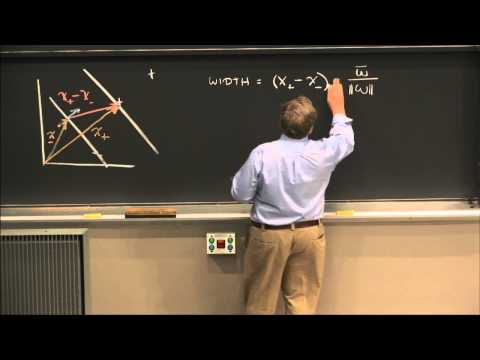

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('_PwhiWxHK8o')

# Dimensionality reduction

Neighborhooders (tSNE, UMAP, etc.) can easily project 3D color space to 2D, and then cluster pixels to classify to color.

5D = (x,y) (r,g,b) and a CNN would know neighborhood to detect line segments...

# Handprint ICR

Intelligent Character Recognition ([ICR](https://www.efilecabinet.com/the-difference-between-ocr-and-icr-and-why-it-matters-for-organizations-using-dms/)) is the term of art for OCR specific to handprint (block letters, as opposed to cursive handwriting).

Clearly this should be experimented with. Nothing has been done at all. 

Where is handwriting recog at WRT cursive?
